In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
# read prepped files
train=pd.read_csv('prepped_train.csv')
test=pd.read_csv('prepped_test.csv')

In [3]:
# read target variable
y=pd.read_csv('target.csv')

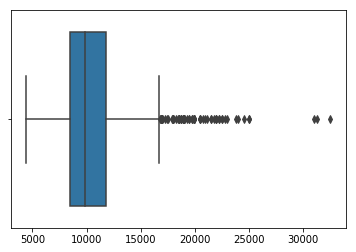

In [4]:
# on the lookout for outliers
sns.boxplot(y)

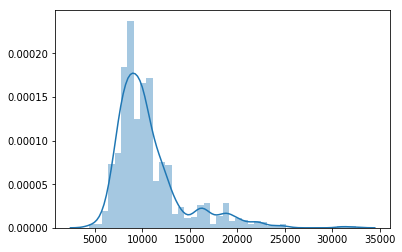

In [5]:
# plot target variable
sns.distplot((y))

In [6]:
# filter out categorical and continuous variables
cat=[ 'Fuel_Type', 'Doors', 'Automatic','MetallicCol']
cont=['Kilometeres', 'Wt', 'Age','HorsePower','CC']

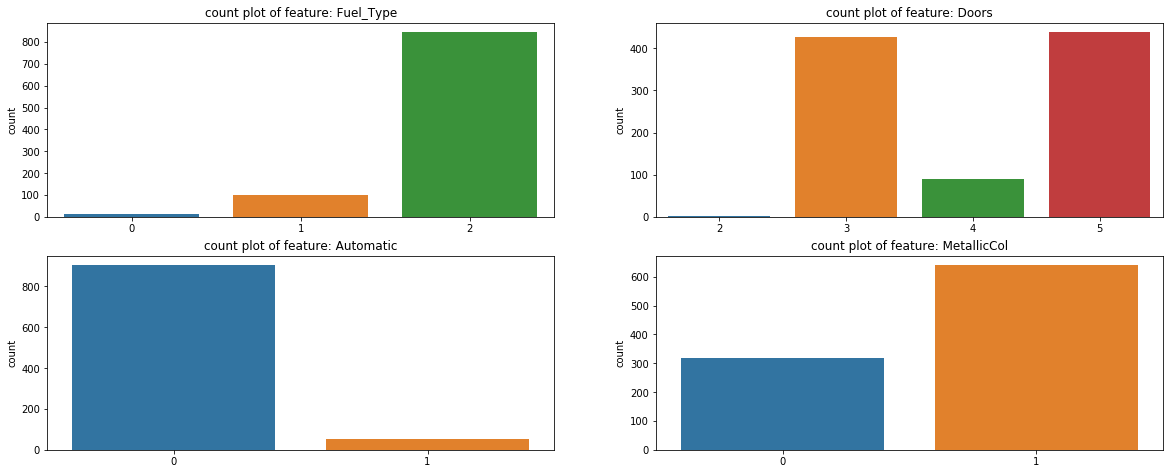

In [7]:
# plot categorical variables
plt.figure(figsize=(20,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(cat):
    ax = plt.subplot(gs[i])
    sns.countplot(train[cn])
    ax.set_xlabel('')
    ax.set_title('count plot of feature: ' + str(cn))
plt.show()

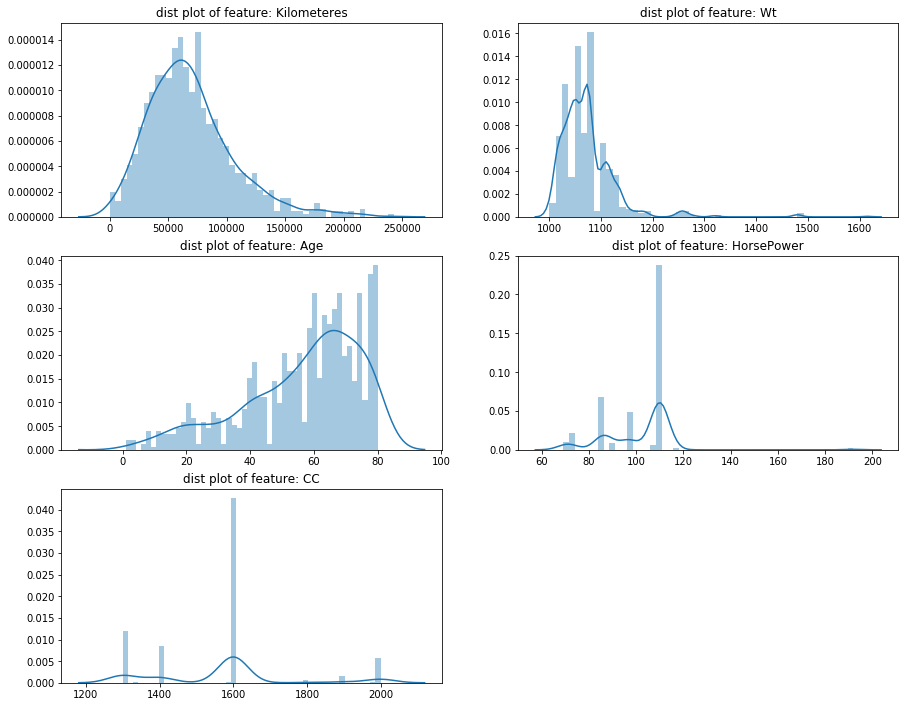

In [8]:
# plot continuous variables
plt.figure(figsize=(15,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(cont):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('dist plot of feature: ' + str(cn))
plt.show()

Kilometeres   -0.536096
Fuel_Type      0.008466
Doors          0.114621
Automatic      0.006154
HorsePower     0.212321
MetallicCol    0.052001
CC             0.053752
Wt             0.476243
Age           -0.851393
Name: SellingPrice, dtype: float64


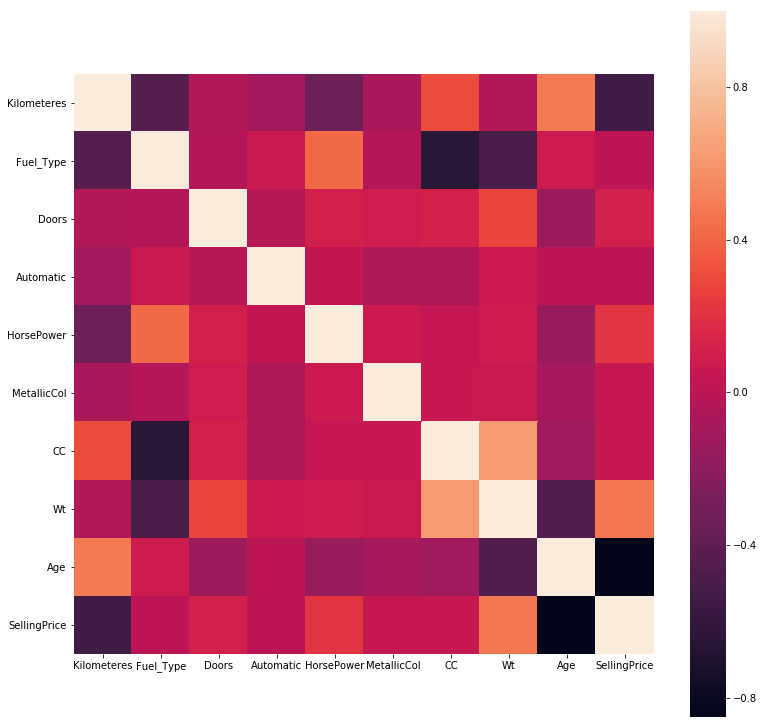

In [9]:
# Correlation with target variable
data=pd.DataFrame()
data=train
data['SellingPrice']=y
plt.figure(figsize=(13, 13))
sns.heatmap(data.corr(), vmax=1, square=True)
print(data.corr()['SellingPrice'][0:-1])

In [10]:
# Calculate pearson co-efficient for important combinations of continuous variables
data_corr = train[cont].corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.3
size=5
# List of pairs along with correlation above threshold
corr_list = []
cols=cont
#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs

Wt and CC = 0.62
Kilometeres and Age = 0.48
Wt and Age = -0.46
Kilometeres and HorsePower = -0.33
Kilometeres and CC = 0.31
